In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [20]:
df = pd.read_csv('dataset/df_cleaned.csv')

In [21]:
df.head()

,Company Name,Model Name,Mobile Weight (gram),RAM (GB),Front Camera Main (MP),Back Camera Main (MP),Processor,Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD),Launched Price (India USD),Launched Price (China USD),Launched Price (USA USD),Launched Price (Dubai USD),Launched Year
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,Apple,3600,6.1,800.0,910.0,814.0,799.0,762.0,2024
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,Apple,3600,6.1,836.0,967.0,856.0,849.0,817.0,2024
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,Apple,3600,6.1,871.0,1024.0,912.0,899.0,871.0,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,Apple,4200,6.7,889.0,1024.0,870.0,899.0,871.0,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,Apple,4200,6.7,925.0,1081.0,912.0,949.0,926.0,2024


In [22]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight (gram)', 'RAM (GB)',
       'Front Camera Main (MP)', 'Back Camera Main (MP)', 'Processor',
       'Battery Capacity (mAh)', 'Screen Size (inch)',
       'Launched Price (Pakistan USD)', 'Launched Price (India USD)',
       'Launched Price (China USD)', 'Launched Price (USA USD)',
       'Launched Price (Dubai USD)', 'Launched Year'],
      dtype='object')

In [23]:
features = ['Mobile Weight (gram)', 'RAM (GB)','Front Camera Main (MP)', 'Back Camera Main (MP)','Battery Capacity (mAh)', 'Screen Size (inch)']
target = ['Launched Price (Pakistan USD)']

In [24]:
X = df[features]
y = df[target]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
print(f"x_train = {x_train.shape}")
print(f"x_test = {x_test.shape}")
print(f"y_train = {y_train.shape}")
print(f"y_test = {y_test.shape}")

x_train = (717, 6)
x_test = (180, 6)
y_train = (717, 1)
y_test = (180, 1)


In [31]:
scalar = MinMaxScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [32]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred = model.predict(x_test_scaled)

In [35]:
mae = mean_absolute_error(y_test, y_pred)

In [36]:
mae

215.39795604489987

In [38]:
import numpy as np

In [40]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 63.10%


In [41]:
y_test

,Launched Price (Pakistan USD)
331,355.0
638,195.0
326,889.0
847,462.0
39,693.0
...,...
777,174.0
25,693.0
84,249.0
10,1156.0


In [42]:
y_pred

array([[ 375.13532131],
       [ 195.90998726],
       [ 621.13701235],
       [ 486.25062436],
       [ 423.50192387],
       [ 332.17727042],
       [ 753.44951455],
       [ 630.64656313],
       [ 454.7121216 ],
       [ 147.37470508],
       [   7.23467291],
       [ 492.34036081],
       [ 239.70174688],
       [ 888.97056293],
       [ 321.29914909],
       [ 239.83220843],
       [ 233.09742318],
       [ 358.27931298],
       [ 319.16078073],
       [ 860.9522157 ],
       [ 548.42550252],
       [ 749.17029554],
       [ 806.25997243],
       [ 285.6201949 ],
       [ 290.86898517],
       [ 121.7291545 ],
       [ 518.80127876],
       [ 646.36727631],
       [ 526.32570745],
       [ 156.55245116],
       [ 752.61110283],
       [ 164.32340714],
       [ 475.87733131],
       [ 465.84585402],
       [ 489.20591699],
       [ 779.25048684],
       [ 608.24374035],
       [ 108.82058635],
       [ 650.93054443],
       [ 162.97931097],
       [ 985.80036471],
       [ 291.873

In [44]:
import matplotlib.pyplot as plt

In [48]:
import seaborn as sns

In [55]:
type(y_test)

pandas.core.frame.DataFrame

In [58]:
y_pred.shape

(180, 1)

<Axes: >

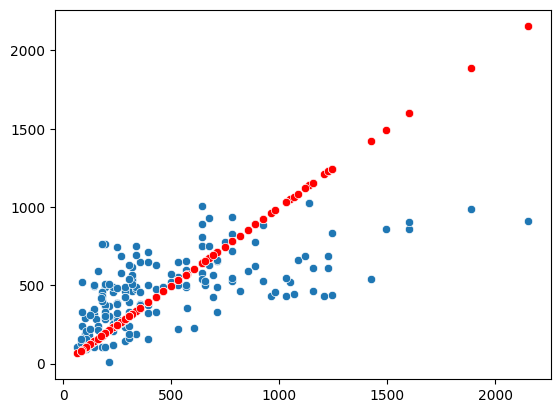

In [61]:
sns.scatterplot(x=y_test.to_numpy().ravel(), y=y_pred.flatten())
sns.scatterplot(x=y_test.to_numpy().ravel(), y=y_test.to_numpy().ravel(), color='red')

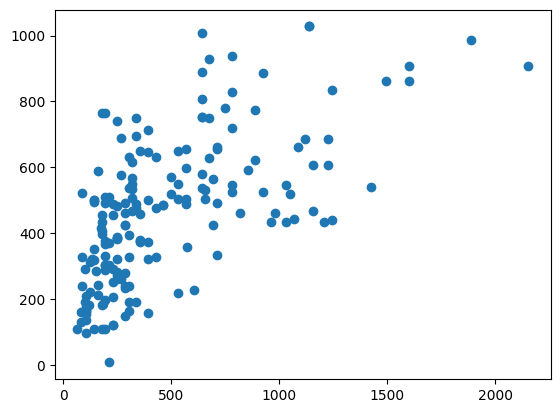

In [65]:
plt.scatter(y_test,y_pred)

In [66]:
df_model = df[features + target]

<Axes: >

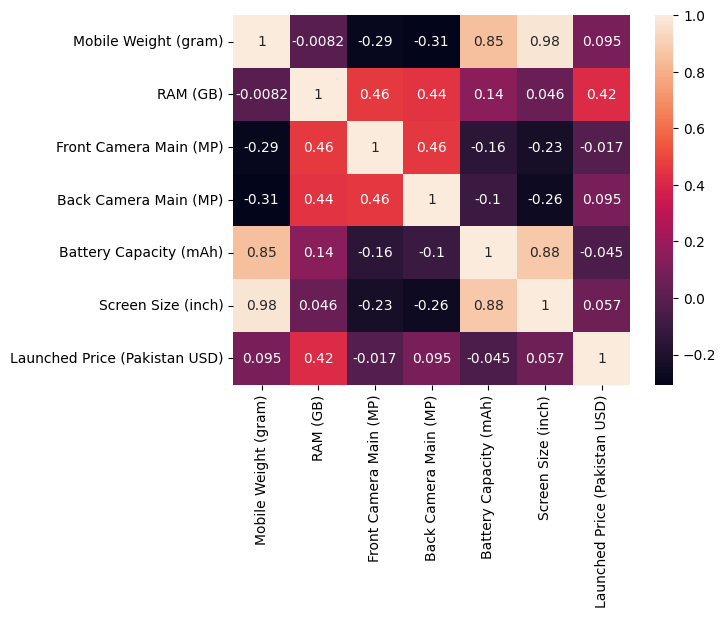

In [69]:
sns.heatmap(df_model.corr(),annot=True)

In [70]:
df_model.corr()

,Mobile Weight (gram),RAM (GB),Front Camera Main (MP),Back Camera Main (MP),Battery Capacity (mAh),Screen Size (inch),Launched Price (Pakistan USD)
Mobile Weight (gram),1.000000,-0.008201,-0.285260,-0.306741,0.848394,0.975893,0.094696
RAM (GB),-0.008201,1.000000,0.463415,0.439564,0.142823,0.046424,0.416457
Front Camera Main (MP),-0.285260,0.463415,1.000000,0.457078,-0.157329,-0.225739,-0.016805
Back Camera Main (MP),-0.306741,0.439564,0.457078,1.000000,-0.104826,-0.261546,0.094884
Battery Capacity (mAh),0.848394,0.142823,-0.157329,-0.104826,1.000000,0.880478,-0.045178
Screen Size (inch),0.975893,0.046424,-0.225739,-0.261546,0.880478,1.000000,0.057472
Launched Price (Pakistan USD),0.094696,0.416457,-0.016805,0.094884,-0.045178,0.057472,1.000000
